### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv("C:/Users/vivek/OneDrive/Desktop/fashion-mnist_train.csv")

In [76]:
X=df.iloc[:,1:785]
y=df.iloc[:,0]


In [78]:
X.shape, y.shape

((60000, 784), (60000,))

In [79]:
from sklearn.model_selection import train_test_split
train_image, test_image, train_label, test_label = train_test_split(
    X,y, test_size=1/7.0, random_state=0)

In [68]:
df.shape

(60000, 785)

In [72]:
df.shape[0]

60000

In [70]:
from sklearn.model_selection import train_test_split
train_image, test_image, train_label, test_label = train_test_split(
    X,y, test_size=1/7.0, random_state=0)

In [71]:
print(train_image.shape)

(60000, 784)


### Retrieving data in the program

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
print("Image Data Shape" , X.shape)

print("Label Data Shape", y.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


In [14]:
from sklearn.model_selection import train_test_split
train_image, test_image, train_label, test_label = train_test_split(
    X,y, test_size=1/7.0, random_state=0)

In [15]:
print(train_image.shape)

(60000, 784)


In [16]:
print(train_label.shape)

(60000,)


In [17]:
print(test_image.shape)

(10000, 784)


In [18]:
print(test_label.shape)

(10000,)


### Show image

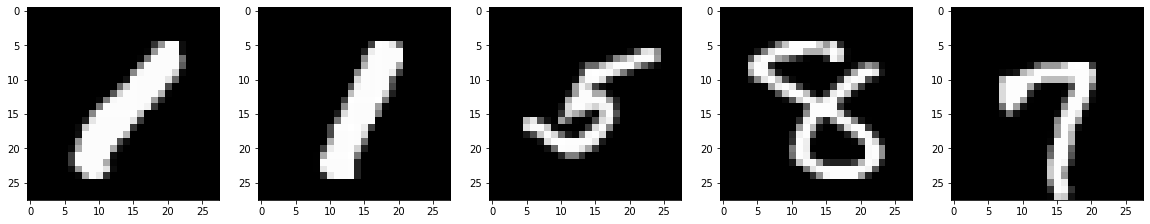

In [48]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_image[50:55],train_label[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 

 ### Build a Logistic Regression model

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
LR = LogisticRegression(solver = 'lbfgs')

In [51]:
LR.fit(train_image, train_label)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
LR.predict(test_image[0].reshape(1,-1))

array(['0'], dtype=object)

In [53]:
LR.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [54]:
predictions = LR.predict(test_image)

In [55]:
score = LR.score(test_img, test_lbl)
print(score)

0.9184


# Analysis of results

### Display Misclassified images with Predicted Labels

In [38]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_label, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

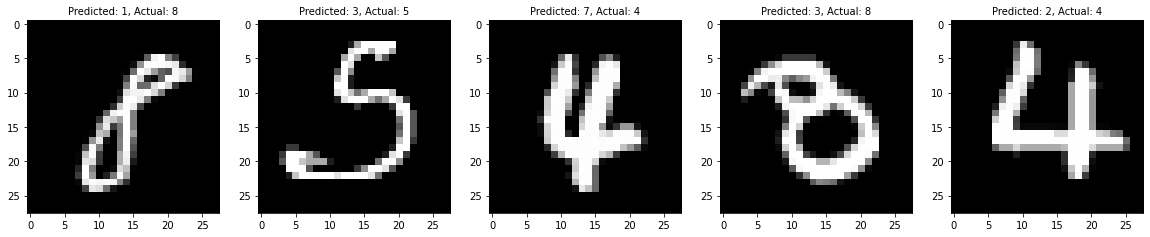

In [47]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_image[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_label[badIndex]), fontsize = 10)

### confusion metrics

In [58]:
from sklearn import metrics

In [62]:
cm = metrics.confusion_matrix(test_label, predictions)

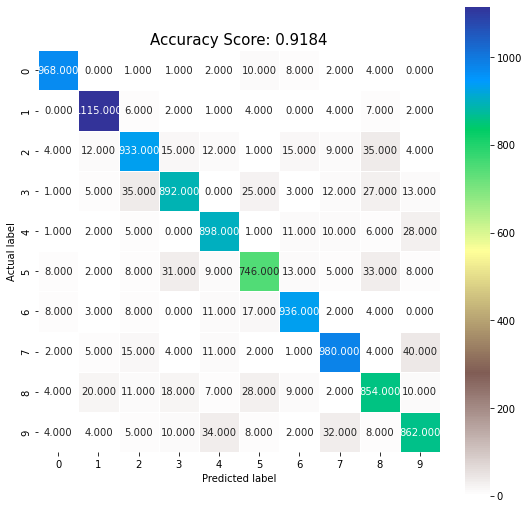

In [64]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'terrain_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);